** Create graphics from search test results.

In [2]:
# as read at https://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html
##setup
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, HTML

import seaborn as sns
sns.set_style("whitegrid")

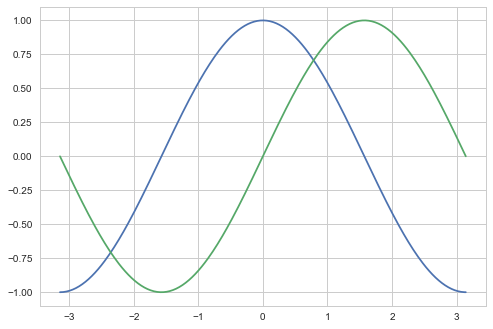

In [3]:
## simple plot
X = np.linspace(-np.pi, np.pi, 256,endpoint=True) # numpy array with 256 values
C,S = np.cos(X), np.sin(X) # 256 points in each
plt.plot(X,C) # blue
plt.plot(X,S) # green
plt.show()

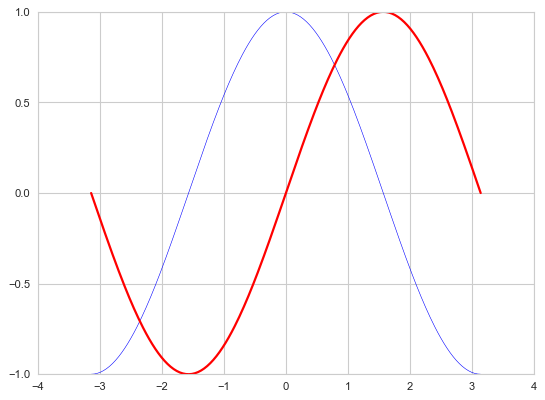

In [19]:
## control drawing options 
# Create a new figure of size 8x6 points, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=80)
# Create a new subplot from a grid of 1x1
plt.subplot(111)
# Plot cosine using blue color with a continuous line of width .5 (pixels)
plt.plot(X, C, color="blue", linewidth=0.5, linestyle="-")
# Plot sine using red color with a continuous line of width 2 (pixels)
plt.plot(X, S, color="red", linewidth=2.0, linestyle="-")
# Set x limits
plt.xlim(-4.0,4.0)
# Set x ticks
plt.xticks(np.linspace(-4,4,9,endpoint=True))
# Set y limits
plt.ylim(-1.0,1.0)
# Set y ticks
plt.yticks(np.linspace(-1,1,5,endpoint=True))
# Save figure using 96 dots per inch
#lt.savefig("exercice_2.png",dpi=96)
# Must be last operstion
plt.show()

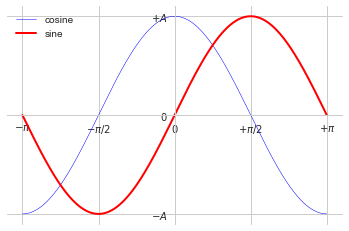

In [27]:
## control axes
def draw1():
    # Setting tick labels
    plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
    plt.yticks([-1, 0, +1],
           [r'$-A$', r'$0$', r'$+A$'])
    # Spines are the lines connecting the axis tick marks and noting the boundaries of the data area. 
    # discard the top and right by setting their color to none and we'll move the bottom and left ones to coordinate 0 in data space coordinates.
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    # add labels
    plt.plot(X, C, color="blue", linewidth=0.5, linestyle="-", label="cosine")
    plt.plot(X, S, color="red", linewidth=2.0, linestyle="-", label="sine")
    plt.legend(loc='upper left', frameon=False)
draw1()
plt.show()

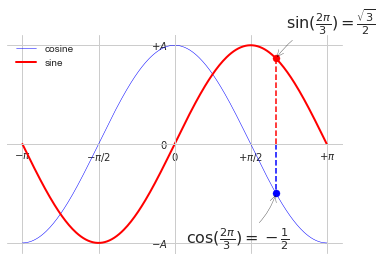

In [28]:
## Annotate some points
draw1()
t = 2*np.pi/3
plt.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.cos(t),], 50, color ='blue')

plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t],[0,np.sin(t)], color ='red', linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.sin(t),], 50, color ='red')

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.show()

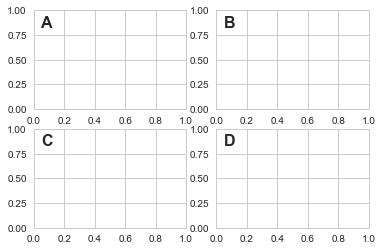

In [25]:
# subplots http://matplotlib.org/users/transforms_tutorial.html
fig = plt.figure()
for i, label in enumerate(('A', 'B', 'C', 'D')):
    ax = fig.add_subplot(2,2,i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')

plt.show()

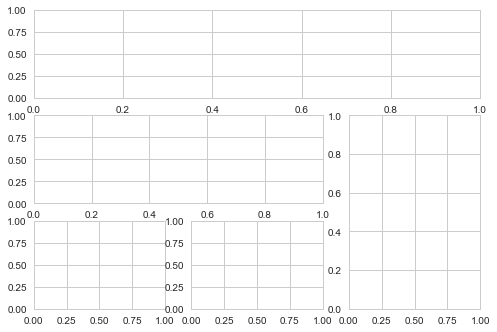

In [8]:
# subplot with gridspec http://matplotlib.org/users/gridspec.html
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 3)
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])

plt.show()

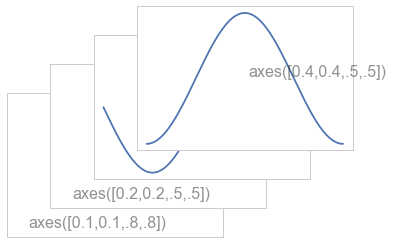

In [37]:
# subplot with gridspec http://matplotlib.org/users/gridspec.html
from pylab import *

axes([0.1,0.1,.5,.5])
xticks([]), yticks([])
text(0.1,0.1, 'axes([0.1,0.1,.8,.8])',ha='left',va='center',size=16,alpha=.5)

axes([0.2,0.2,.5,.5])
xticks([]), yticks([])
text(0.1,0.1, 'axes([0.2,0.2,.5,.5])',ha='left',va='center',size=16,alpha=.5)

axes([0.3,0.3,.5,.5])
xticks([]), yticks([])
text(0.1,0.1, 'axes([0.3,0.3,.5,.5])',ha='left',va='center',size=16,alpha=.5)
plot(X,S)

axes([0.4,0.4,.5,.5])
xticks([]), yticks([])
text(0.1,0.1, 'axes([0.4,0.4,.5,.5])',ha='left',va='center',size=16,alpha=.5)
plt.plot(X,C)

plt.show()

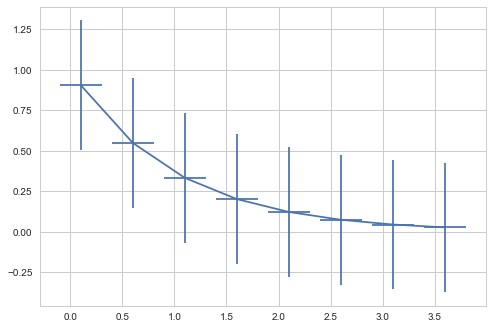

In [4]:
# Demo of the errorbar function http://matplotlib.org/examples/statistics/errorbar_demo.html
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.show()

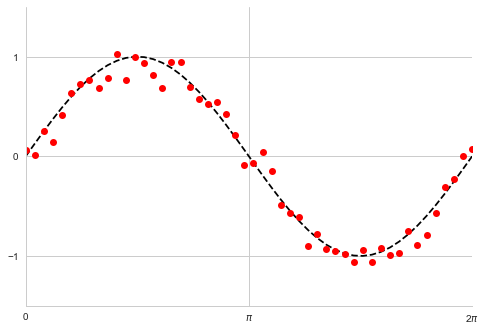

In [5]:
# spines using custom bounds to limit the extent of the spine.
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
y2 = y + 0.1 * np.random.normal(size=x.shape)

fig, ax = plt.subplots()
ax.plot(x, y, 'k--')
ax.plot(x, y2, 'ro')

# set ticks and tick labels
ax.set_xlim((0, 2*np.pi))
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(['0', '$\pi$', '2$\pi$'])
ax.set_ylim((-1.5, 1.5))
ax.set_yticks([-1, 0, 1])

# Only draw spine between the y-ticks
ax.spines['left'].set_bounds(-1, 1)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()